# 🏠Predicting the House Sale Prices using Machine Learning

## 1. Problem Definition
We have 79 variables which contain data about almost every aspect of residential homes in Ames, Iowa. Can we predict the final price of homes?

I was able to get into the 20% of teams in with this submission. Using the Catboost algorithm gave us the best results.

## 2. Data
This data is taken from the Kaggle Competition "House Prices: Advanced Regression Techniques".

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

We will have a train.csv, and a test.csv

## 3. Evaluation
The evaluation metric for this competition is RMSE (Root Mean Squared Error)

## 4. Data
Data Dictionary: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [52]:
df = pd.read_csv("data/Kaggle-HousePricesComp/train.csv", low_memory=False)
original = pd.read_csv("data/Kaggle-HousePricesComp/train.csv", low_memory=False)
test = pd.read_csv("data/Kaggle-HousePricesComp/test.csv", low_memory=False)

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## What part of my data has null/missing values?

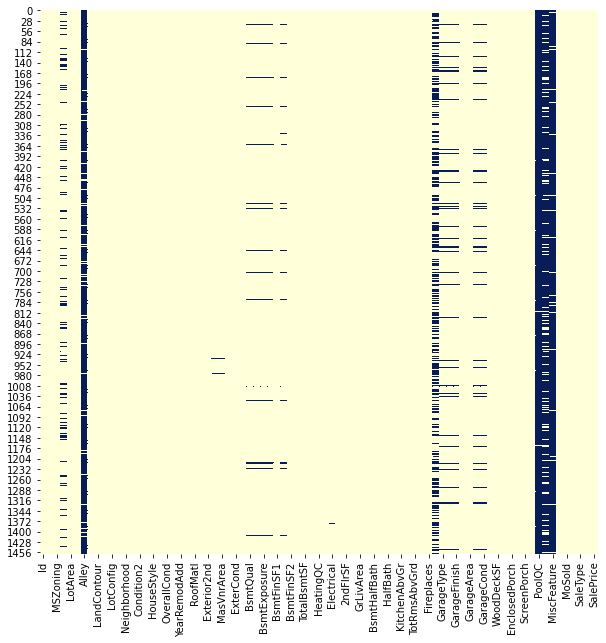

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')

### Convert String Data to Categorical Data

In [7]:
# Find the columns which contains strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [8]:
# This will turn all of the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
        # As ordered makes them ordered

In [9]:
# This will turn all of the string value into category values
for label, content in test.items():
    if pd.api.types.is_string_dtype(content):
        test[label] = content.astype("category").cat.as_ordered()
        # As ordered makes them ordered

### So now instead of having string data, we have categorical data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

### Fill Missing Numeric Values

In [11]:
# For our numeric data types, let's check which columns have null values.
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [12]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [13]:
# Fill numeric rows with the median
for label, content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median
            test[label] = content.fillna(content.median())

### Fill categorical values with numbers

In [14]:
# Check for columns which are not numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [15]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes + 1
        # Why + 1? Because pandas assigns missing values as -1, so we want it to be 0

In [16]:
# Turn categorical variables into numbers and fill missing
for label, content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        test[label] = pd.Categorical(content).codes + 1
        # Why + 1? Because pandas assigns missing values as -1, so we want it to be 0

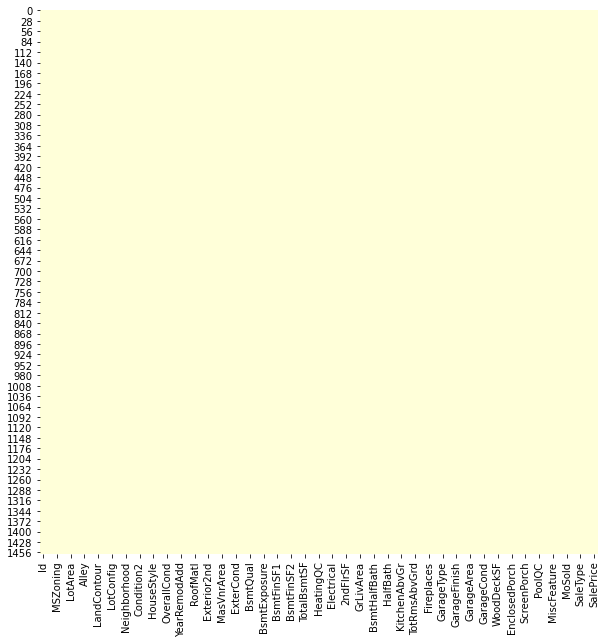

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')

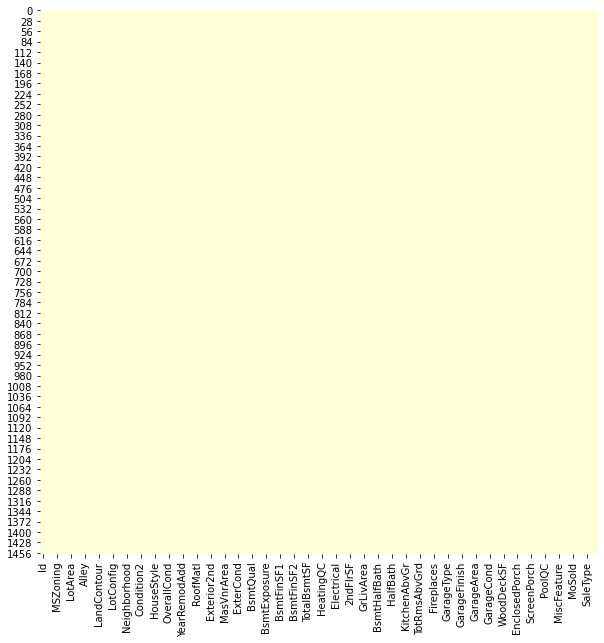

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(test.isnull(), cbar=False, cmap='YlGnBu')

In [19]:
df.shape, test.shape

((1460, 81), (1459, 80))

In [20]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Modeling

In [22]:
from sklearn.ensemble import RandomForestRegressor
#Instantiate
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42)

# Fit the model
model.fit(df.drop("SalePrice", axis=1), df["SalePrice"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [23]:
# Score the model
model.score(df.drop("SalePrice", axis=1), df["SalePrice"])

0.9802035801281889

In [24]:
X_train, y_train = df.drop("SalePrice", axis = 1), df.SalePrice

This is a good baseline, but since we evaluated on the same data that we trained on... it is not reliable.

Also score returns the coefficient of determination R^2 of the prediction.... NOT RMSE

In [25]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    # If our model performs better on the training set, it could be a sign our model is overfitting
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Training RMSE": mean_squared_error(y_train, train_preds, squared=False),
              "Training R^2": r2_score(y_train, train_preds)}
    return scores

In [26]:
show_scores(model)

{'Training MAE': 6539.731568493151,
 'Training RMSE': 11173.711777127626,
 'Training R^2': 0.9802035801281889}

## Randomized Search CV

In [27]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor Hyperparameters

rf_grid = {"n_estimators": np.arange(10, 1000, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                    random_state = 0),
                             param_distributions = rf_grid,
                              # raising the n_iter's would increase computing time
                              # But it would also more likely find the best hyper_parameters
                             n_iter=25,
                             cv=5,
                             verbose=True)

# Fit the randomizedsearchcv model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.6min finished


Wall time: 1min 37s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                   n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140,...0, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700

In [28]:
rs_model.best_params_

{'n_estimators': 470,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}

In [29]:
show_scores(rs_model)

{'Training MAE': 8870.3432196862,
 'Training RMSE': 13919.016015999294,
 'Training R^2': 0.9692808781788402}

## Ideal Model with RandomForest

In [47]:
%%time

# most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 470,
                                    min_samples_leaf = 1,
                                    min_samples_split = 6,
                                    max_features = 0.5,
                                    n_jobs =-1,
                                    max_depth=10,
                                    random_state=0)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 963 ms


RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_split=6,
                      n_estimators=470, n_jobs=-1, random_state=0)

In [48]:
test_preds = ideal_model.predict(test)

In [49]:
len(test_preds)

1459

In [50]:
df_preds = pd.DataFrame()
df_preds["Id"] = test["Id"]
df_preds["SalePrice"] = test_preds
df_preds

,Id,SalePrice
0,1461,124727.192869
1,1462,152315.667876
2,1463,177411.335119
3,1464,182099.124114
4,1465,198344.537825
...,...,...
1454,2915,86312.555609
1455,2916,87583.031238
1456,2917,153392.621339
1457,2918,113143.114666


## XG Boost

In [34]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 0)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
show_scores(regressor)

{'Training MAE': 1081.9616518621576,
 'Training RMSE': 1526.0930143890987,
 'Training R^2': 0.9996307217441889}

In [36]:
test_preds_boost = regressor.predict(test)

In [37]:
df_preds_boost = pd.DataFrame()
df_preds_boost["Id"] = test["Id"]
df_preds_boost["SalePrice"] = test_preds_boost
df_preds_boost

,Id,SalePrice
0,1461,116433.296875
1,1462,148036.515625
2,1463,183923.093750
3,1464,202934.312500
4,1465,178378.312500
...,...,...
1454,2915,84229.117188
1455,2916,79941.960938
1456,2917,162267.437500
1457,2918,86800.765625


## CatBoost

In [38]:
from catboost import CatBoostRegressor
catboost = CatBoostRegressor(random_state=0)
catboost.fit(X_train, y_train)

Learning rate set to 0.04175
0:	learn: 77381.8047638	total: 56.6ms	remaining: 56.6s
1:	learn: 75393.7398016	total: 59.2ms	remaining: 29.5s
2:	learn: 73259.9904252	total: 61.6ms	remaining: 20.5s
3:	learn: 71342.8268973	total: 64.1ms	remaining: 16s
4:	learn: 69454.9987491	total: 66.6ms	remaining: 13.3s
5:	learn: 67659.3888738	total: 69.1ms	remaining: 11.4s
6:	learn: 65913.4260706	total: 71.8ms	remaining: 10.2s
7:	learn: 64557.5401658	total: 74.2ms	remaining: 9.2s
8:	learn: 62944.5334760	total: 76.7ms	remaining: 8.45s
9:	learn: 61377.5310414	total: 79.2ms	remaining: 7.84s
10:	learn: 60081.5351993	total: 81.8ms	remaining: 7.35s
11:	learn: 58703.0704996	total: 84.2ms	remaining: 6.94s
12:	learn: 57307.0160663	total: 86.7ms	remaining: 6.58s
13:	learn: 56112.7175361	total: 89.3ms	remaining: 6.29s
14:	learn: 54921.6693657	total: 92ms	remaining: 6.04s
15:	learn: 53767.7204671	total: 94.8ms	remaining: 5.83s
16:	learn: 52736.1581782	total: 97.4ms	remaining: 5.63s
17:	learn: 51674.6480109	total: 99

179:	learn: 17839.0443814	total: 510ms	remaining: 2.32s
180:	learn: 17795.9784138	total: 513ms	remaining: 2.32s
181:	learn: 17759.9714051	total: 516ms	remaining: 2.32s
182:	learn: 17742.8459108	total: 518ms	remaining: 2.31s
183:	learn: 17710.8403781	total: 521ms	remaining: 2.31s
184:	learn: 17677.2825330	total: 524ms	remaining: 2.31s
185:	learn: 17659.8032234	total: 526ms	remaining: 2.3s
186:	learn: 17636.5823056	total: 528ms	remaining: 2.3s
187:	learn: 17605.0686753	total: 531ms	remaining: 2.29s
188:	learn: 17580.1344256	total: 533ms	remaining: 2.29s
189:	learn: 17550.7064141	total: 535ms	remaining: 2.28s
190:	learn: 17515.7663001	total: 538ms	remaining: 2.28s
191:	learn: 17490.6213361	total: 540ms	remaining: 2.27s
192:	learn: 17462.4178838	total: 543ms	remaining: 2.27s
193:	learn: 17447.0035047	total: 545ms	remaining: 2.26s
194:	learn: 17417.0745421	total: 547ms	remaining: 2.26s
195:	learn: 17385.6811277	total: 550ms	remaining: 2.25s
196:	learn: 17346.9697081	total: 552ms	remaining: 

369:	learn: 12818.0145149	total: 1.02s	remaining: 1.74s
370:	learn: 12783.3752860	total: 1.03s	remaining: 1.74s
371:	learn: 12767.1005705	total: 1.03s	remaining: 1.74s
372:	learn: 12753.1852854	total: 1.03s	remaining: 1.73s
373:	learn: 12728.1893964	total: 1.03s	remaining: 1.73s
374:	learn: 12708.9210237	total: 1.04s	remaining: 1.73s
375:	learn: 12699.9727815	total: 1.04s	remaining: 1.72s
376:	learn: 12670.0258270	total: 1.04s	remaining: 1.72s
377:	learn: 12641.2607423	total: 1.04s	remaining: 1.72s
378:	learn: 12625.0996333	total: 1.05s	remaining: 1.72s
379:	learn: 12615.2042709	total: 1.05s	remaining: 1.71s
380:	learn: 12607.8582116	total: 1.05s	remaining: 1.71s
381:	learn: 12588.2672653	total: 1.05s	remaining: 1.71s
382:	learn: 12558.3794411	total: 1.06s	remaining: 1.7s
383:	learn: 12539.6066620	total: 1.06s	remaining: 1.7s
384:	learn: 12512.4796057	total: 1.06s	remaining: 1.7s
385:	learn: 12495.6802582	total: 1.06s	remaining: 1.69s
386:	learn: 12471.7721203	total: 1.07s	remaining: 1

565:	learn: 9912.3522781	total: 1.54s	remaining: 1.18s
566:	learn: 9902.9176762	total: 1.54s	remaining: 1.18s
567:	learn: 9888.6731678	total: 1.54s	remaining: 1.17s
568:	learn: 9883.0258046	total: 1.54s	remaining: 1.17s
569:	learn: 9866.6382117	total: 1.55s	remaining: 1.17s
570:	learn: 9854.1990899	total: 1.55s	remaining: 1.16s
571:	learn: 9845.2336371	total: 1.55s	remaining: 1.16s
572:	learn: 9835.4530668	total: 1.55s	remaining: 1.16s
573:	learn: 9822.0343867	total: 1.56s	remaining: 1.16s
574:	learn: 9812.5000715	total: 1.56s	remaining: 1.15s
575:	learn: 9802.2695931	total: 1.56s	remaining: 1.15s
576:	learn: 9784.3035861	total: 1.57s	remaining: 1.15s
577:	learn: 9779.1888559	total: 1.57s	remaining: 1.15s
578:	learn: 9777.4318244	total: 1.57s	remaining: 1.14s
579:	learn: 9772.0661427	total: 1.58s	remaining: 1.14s
580:	learn: 9755.6257439	total: 1.58s	remaining: 1.14s
581:	learn: 9745.6217068	total: 1.58s	remaining: 1.14s
582:	learn: 9728.6348131	total: 1.58s	remaining: 1.13s
583:	learn

766:	learn: 7925.9059835	total: 2.05s	remaining: 623ms
767:	learn: 7917.9258482	total: 2.05s	remaining: 620ms
768:	learn: 7913.3977283	total: 2.05s	remaining: 617ms
769:	learn: 7910.3107700	total: 2.06s	remaining: 615ms
770:	learn: 7905.3656945	total: 2.06s	remaining: 612ms
771:	learn: 7902.8100379	total: 2.06s	remaining: 609ms
772:	learn: 7893.5158241	total: 2.06s	remaining: 606ms
773:	learn: 7882.3129503	total: 2.07s	remaining: 604ms
774:	learn: 7875.1958659	total: 2.07s	remaining: 601ms
775:	learn: 7870.5841206	total: 2.07s	remaining: 599ms
776:	learn: 7863.5987358	total: 2.08s	remaining: 596ms
777:	learn: 7862.6891591	total: 2.08s	remaining: 593ms
778:	learn: 7861.9963270	total: 2.08s	remaining: 590ms
779:	learn: 7854.4832686	total: 2.08s	remaining: 588ms
780:	learn: 7843.8504838	total: 2.09s	remaining: 585ms
781:	learn: 7834.7074095	total: 2.09s	remaining: 582ms
782:	learn: 7828.0258120	total: 2.09s	remaining: 580ms
783:	learn: 7820.2398213	total: 2.09s	remaining: 577ms
784:	learn

967:	learn: 6457.5426610	total: 2.56s	remaining: 84.8ms
968:	learn: 6455.2926782	total: 2.57s	remaining: 82.1ms
969:	learn: 6443.8204431	total: 2.57s	remaining: 79.5ms
970:	learn: 6437.7827426	total: 2.57s	remaining: 76.8ms
971:	learn: 6426.9697999	total: 2.58s	remaining: 74.2ms
972:	learn: 6419.4845594	total: 2.58s	remaining: 71.5ms
973:	learn: 6419.0478268	total: 2.58s	remaining: 68.9ms
974:	learn: 6418.6335497	total: 2.58s	remaining: 66.2ms
975:	learn: 6412.9767952	total: 2.58s	remaining: 63.6ms
976:	learn: 6403.2616104	total: 2.59s	remaining: 60.9ms
977:	learn: 6395.5563618	total: 2.59s	remaining: 58.3ms
978:	learn: 6387.8951456	total: 2.59s	remaining: 55.6ms
979:	learn: 6378.9276267	total: 2.6s	remaining: 53ms
980:	learn: 6374.5199186	total: 2.6s	remaining: 50.3ms
981:	learn: 6362.8044822	total: 2.6s	remaining: 47.7ms
982:	learn: 6359.3634081	total: 2.6s	remaining: 45ms
983:	learn: 6353.4366962	total: 2.6s	remaining: 42.4ms
984:	learn: 6346.0310659	total: 2.61s	remaining: 39.7ms
9

In [39]:
show_scores(catboost)

{'Training MAE': 4759.692452610346,
 'Training RMSE': 6270.0056638411315,
 'Training R^2': 0.9937665627295762}

In [40]:
cat_preds_boost = catboost.predict(test)

In [41]:
cat_preds_df = pd.DataFrame()
cat_preds_df["Id"] = test["Id"]
cat_preds_df["SalePrice"] = cat_preds_boost
cat_preds_df

,Id,SalePrice
0,1461,123337.553655
1,1462,165288.566762
2,1463,184555.011894
3,1464,192977.853715
4,1465,190339.228473
...,...,...
1454,2915,83707.337061
1455,2916,83442.608117
1456,2917,174848.341441
1457,2918,117661.614393


# Outcome:
Our Cat Boost Regressor Model Performed Best

In [42]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"Features": columns,
                        "Importances": importances})
         .sort_values("Importances", ascending=False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["Features"][:n], df["Importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()

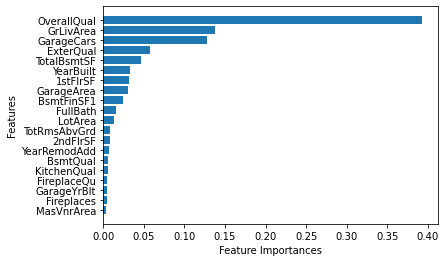

In [43]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [51]:
# Export prediction data
df_preds.to_csv("data/Kaggle-HousePricesComp/houseprice_pred2.csv", index=False)

In [45]:
cat_preds_df.to_csv("data/Kaggle-HousePricesComp/cat_preds_df.csv", index = False)

In [46]:
df_preds_boost.to_csv("data/Kaggle-HousePricesComp/houseprice_pred_boost.csv", index = False)